# Step 3 - Classification of text data using recurrent neural networks (LSTM)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Job Type

In [ ]:
def str_to_num_lst(x):
    x = x.replace("'", "").replace("[", "").replace("]", "").split(", ")
    return list(map(int, x))

In [ ]:
# load saved data from step 2 (numerical vectors)

train_df = pd.read_csv("/content/gdrive/MyDrive/practice_nlp_2022/data/tmp_type_train.csv")
train_df['job_description'] = train_df['job_description'].apply(lambda x: str_to_num_lst(x))
X_train = train_df["job_description"]
Y_train = train_df["y"]
y_train = np.asarray(Y_train).astype("float32")

test_df = pd.read_csv("/content/gdrive/MyDrive/practice_nlp_2022/data/tmp_type_test.csv")
test_df['job_description'] = test_df['job_description'].apply(lambda x: str_to_num_lst(x))
X_test = test_df["job_description"]
Y_test = test_df["y"]
y_test = np.asarray(Y_test).astype("float32")

### Train a recurrent neural network

In [ ]:
max_seq_len = 80

x_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen = max_seq_len)
x_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen = max_seq_len)

In [ ]:
emb_dim = 128
max_features = 20000

model_type = keras.Sequential()
model_type.add(layers.Embedding(max_features, emb_dim))
model_type.add(layers.LSTM(128))
model_type.add(layers.Dense(6, activation = 'softmax'))

In [ ]:
model_type.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

# Stop training when a monitored metric has stopped improving.
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)] 

history = model_type.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 256,
    validation_split = 0.2,
    shuffle = True,
    verbose = 2,
    callbacks = my_callbacks
)

Epoch 1/10
45/45 - 4s - loss: 0.6682 - accuracy: 0.8819 - val_loss: 0.4370 - val_accuracy: 0.8949 - 4s/epoch - 91ms/step
Epoch 2/10
45/45 - 1s - loss: 0.4113 - accuracy: 0.8942 - val_loss: 0.4078 - val_accuracy: 0.8949 - 1s/epoch - 29ms/step
Epoch 3/10
45/45 - 1s - loss: 0.3370 - accuracy: 0.8933 - val_loss: 0.2873 - val_accuracy: 0.8924 - 1s/epoch - 29ms/step
Epoch 4/10
45/45 - 1s - loss: 0.2200 - accuracy: 0.9264 - val_loss: 0.1771 - val_accuracy: 0.9462 - 1s/epoch - 29ms/step
Epoch 5/10
45/45 - 1s - loss: 0.1372 - accuracy: 0.9525 - val_loss: 0.2123 - val_accuracy: 0.9388 - 1s/epoch - 29ms/step
Epoch 6/10
45/45 - 1s - loss: 0.1180 - accuracy: 0.9668 - val_loss: 0.1550 - val_accuracy: 0.9543 - 1s/epoch - 31ms/step
Epoch 7/10
45/45 - 1s - loss: 0.0827 - accuracy: 0.9768 - val_loss: 0.0985 - val_accuracy: 0.9713 - 1s/epoch - 30ms/step
Epoch 8/10
45/45 - 1s - loss: 0.0674 - accuracy: 0.9804 - val_loss: 0.0947 - val_accuracy: 0.9738 - 1s/epoch - 29ms/step
Epoch 9/10
45/45 - 1s - loss: 0.

In [ ]:
print(model_type.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 2,692,358
Trainable params: 2,692,358
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
def loss_plot(history):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

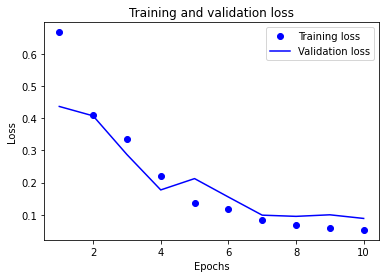

In [ ]:
loss_plot(history)

In [ ]:
score = model_type.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.08935113251209259
Test accuracy: 0.9736692905426025


### Job Category

In [ ]:
train_df = pd.read_csv("/content/gdrive/MyDrive/practice_nlp_2022/data/tmp_category_train.csv")
train_df['job_description'] = train_df['job_description'].apply(lambda x: str_to_num_lst(x))
X_train = train_df["job_description"]
Y_train = train_df["y"]
y_train = np.asarray(Y_train).astype("float32")

test_df = pd.read_csv("/content/gdrive/MyDrive/practice_nlp_2022/data/tmp_category_test.csv")
test_df['job_description'] = test_df['job_description'].apply(lambda x: str_to_num_lst(x))
X_test = test_df["job_description"]
Y_test = test_df["y"]
y_test = np.asarray(Y_test).astype("float32")

In [ ]:
max_seq_len = 80

x_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen = max_seq_len)
x_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen = max_seq_len)

In [ ]:
emb_dim = 128
max_features = 20000

model_category = keras.Sequential()
model_category.add(layers.Embedding(max_features, emb_dim))
model_category.add(layers.LSTM(128))
model_category.add(layers.Dense(11, activation = 'softmax'))

In [ ]:
model_category.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

history = model_category.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2,
    shuffle = True,
    verbose = 2,
    callbacks = my_callbacks
)

Epoch 1/10
89/89 - 5s - loss: 1.8732 - accuracy: 0.3383 - val_loss: 1.6472 - val_accuracy: 0.3961 - 5s/epoch - 54ms/step
Epoch 2/10
89/89 - 2s - loss: 1.5233 - accuracy: 0.4321 - val_loss: 1.4526 - val_accuracy: 0.4623 - 2s/epoch - 23ms/step
Epoch 3/10
89/89 - 2s - loss: 1.3282 - accuracy: 0.4988 - val_loss: 1.3245 - val_accuracy: 0.5083 - 2s/epoch - 24ms/step
Epoch 4/10
89/89 - 2s - loss: 1.1753 - accuracy: 0.5527 - val_loss: 1.2584 - val_accuracy: 0.5278 - 2s/epoch - 23ms/step
Epoch 5/10
89/89 - 2s - loss: 1.0807 - accuracy: 0.5816 - val_loss: 1.3013 - val_accuracy: 0.5168 - 2s/epoch - 23ms/step
Epoch 6/10
89/89 - 2s - loss: 1.0088 - accuracy: 0.6041 - val_loss: 1.1942 - val_accuracy: 0.5533 - 2s/epoch - 24ms/step
Epoch 7/10
89/89 - 2s - loss: 0.9556 - accuracy: 0.6174 - val_loss: 1.1849 - val_accuracy: 0.5543 - 2s/epoch - 23ms/step
Epoch 8/10
89/89 - 2s - loss: 0.9095 - accuracy: 0.6306 - val_loss: 1.1815 - val_accuracy: 0.5558 - 2s/epoch - 23ms/step
Epoch 9/10
89/89 - 2s - loss: 0.

In [ ]:
print(model_category.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 11)                1419      
                                                                 
Total params: 2,693,003
Trainable params: 2,693,003
Non-trainable params: 0
_________________________________________________________________
None


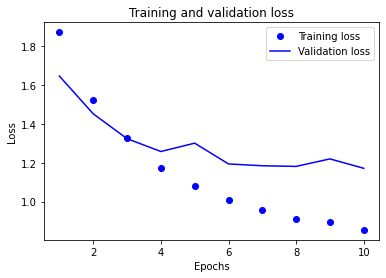

In [ ]:
loss_plot(history)

In [ ]:
score = model_category.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 1.139417052268982
Test accuracy: 0.5549263954162598
